<a href="https://colab.research.google.com/github/mandudu/Deep-Learning-Projects/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

# Problem 1 was hand written. See pdf attached in the submitted section of SAKAI

# 2. Implementing the logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loss function
def loss(y,o): 
  loss = np.log(1+np.exp(-y*o))
  return loss

#Derivative of loss function
def diff(y,o):
  diff = -y/(np.exp(o*y)+1)
  return diff

def soft(o):
  return(np.exp(o.T)/ np.sum(np.exp(o), axis=1)).T

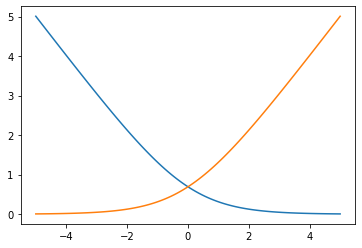

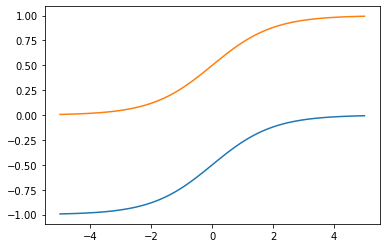

<ipython-input-114-8844c8fb50fe>:7: RuntimeWarning: overflow encountered in exp
  loss = np.log(1+np.exp(-y*o))


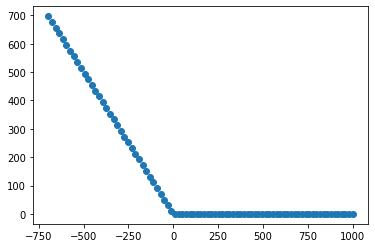

In [ ]:
o = np.array(np.linspace(-5,5,100))
o_thousand = np.array(np.linspace(-1000,1000,100))

#plot of the loss function
plt.plot(o, loss(1.0,o))
plt.plot(o, loss(-1.0,o))
plt.show()

#plot of the derived loss function
plt.plot(o, diff(1.0,o))
plt.plot(o, diff(-1.0,o))
plt.show()

#plot of o ∈ [-1000,1000]
plt.scatter(o_thousand, loss(1.0,o_thousand))


As o moves towards the positive end, it shows that it is dull with changes. On the other side, as o moves towards the negative end, it shows that the error computation exceeds the limit of the program. The reason behind this is because when o is an extremely large negative number in the case where y = 1, the equation would become exp(|-o|), which will be an extremely high number that the python language couldn't handle. On the other side, if o is an extremely large positive number, the signs will be opposite, exp(-o). This will eventually equal to 0.    


# Question 3 was hand written. See PDF

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [ ]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

In [ ]:
x,y = generate_data()
x.shape, y.shape

((1000,), (1000,))

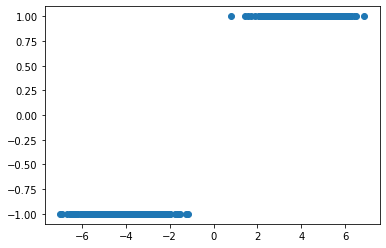

In [ ]:
plt.scatter(x,y)

In [ ]:
x = x.reshape([1000,1])
y = y.reshape([1000,1])

In [ ]:
class logistic_regression():
  x,y = generate_data()

  def fit(self,x,y,lr,iterations):
    self.bias = np.ones(1)
    self.weights = np.ones(1)
    self.costs = []


    for i in range(iterations):
      o = x * self.weights + self.bias

      lost_list = np.mean(loss(y,o))
      self.costs.append(lost_list)

      dw = np.mean(x*diff(y,o))
      db = np.mean(diff(y,o))

      self.weights = self.weights - lr * dw
      self.bias = self.bias - lr * db      



In [ ]:
model = logistic_regression()
model.fit(x,y,0.05,100000)
model.weights, model.bias


(array([3.86368387]), array([0.36443523]))

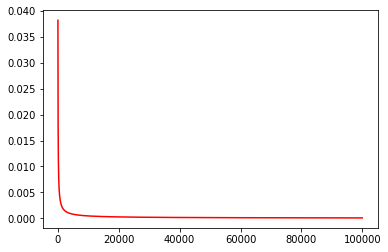

In [ ]:
plt.plot(list(range(100000)),model.costs, '-r')

After iterating the for loop with 100,000 epochs, the error converges to 0. This is mainly because the softmax cost function is convex due to the Softmax's Hessian matrix being nonnegative. This means that by minimizing the gradient of the softmax's cost function, we could converge into the minimized optimal point, which is represented by the graph above. 

Collaborated and shared ideas of how to combat the problem with Cheng Che Tsim. Never traded codes. 